In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import empiricaldist as ep

In [2]:
df = pd.read_csv("ibm.csv")

df.head()

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

(array([ 28.,  29.,  40.,  65.,  96., 128., 130., 135., 147., 108., 139.,
         78.,  74.,  57.,  43.,  49.,  37.,  40.,  18.,  29.]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ]),
 <a list of 20 Patch objects>)

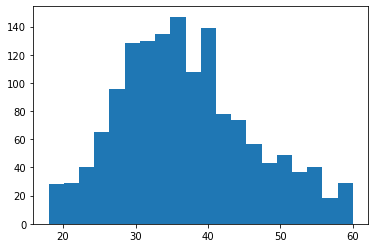

In [3]:
#histograma estándar

%matplotlib inline

plt.hist(df["Age"], bins = 20)

## Probability Mass function o PMF

In [4]:
# probability mass function o pmf

age = df["Age"].values

PMF = ep.Pmf.from_seq(age)

PMF



,probs
18,0.005442
19,0.006122
20,0.007483
21,0.008844
22,0.010884
23,0.009524
24,0.017687
25,0.017687
26,0.026531
27,0.032653


Text(0.5, 1.0, 'IBM workers fistributed per age')

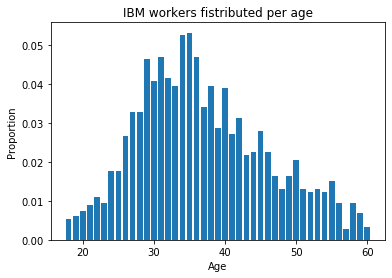

In [5]:
PMF.bar()
plt.xlabel("Age")
plt.ylabel("Proportion")
plt.title("IBM workers fistributed per age")

In [6]:
#saber proporcion acumulada en un año concreto

año = 50
pd_año = PMF(año)
pd_año

0.02040816326530612

## Cumulative Distribution Function o CDF

In [7]:
age = df["Age"].values

CDF = ep.Cdf.from_seq(age)

CDF

,probs
18,0.005442
19,0.011565
20,0.019048
21,0.027891
22,0.038776
23,0.048299
24,0.065986
25,0.083673
26,0.110204
27,0.142857


Text(0.5, 1.0, 'IBM workers distributed per age')

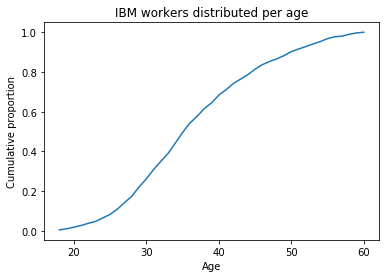

In [8]:
CDF.plot()
plt.xlabel("Age")
plt.ylabel("Cumulative proportion")
plt.title("IBM workers distributed per age")

In [9]:
#saber proporcion acumulada en un año concreto

año = 50
p_año = CDF(año)
p_año

array(0.90272109)

In [10]:
#saber la proporcion acumulada inversa en un año concreto

# en qué año está la mitad de la curva?
quierosaber = 0.5

qs = CDF.inverse(quierosaber)

# La mediana de los empleados se situa en 34 años
qs


array(36.)

In [11]:
#comprobamos

df["Age"].median()

36.0

## PDF y CDF dependiendo de la attrition

In [12]:
#Comparamos PMF y CDF dependiendo de la attrition

In [13]:
df1 = df[df["Attrition"]=="Yes"]
df2 = df[df["Attrition"]!="Yes"]

In [14]:
#Valores de edad
age1 = df1["Age"].values
age2 = df2["Age"].values

#Creamos PMF
PMF1 = ep.Pmf.from_seq(age1)
PMF2 = ep.Pmf.from_seq(age2)

#Creamos CDF
CDF1 = ep.Cdf.from_seq(age1)
CDF2 = ep.Cdf.from_seq(age2)

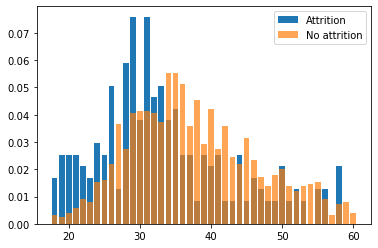

In [15]:
PMF1.bar(label="Attrition")
PMF2.bar(alpha=0.7,label="No attrition")
plt.legend()
plt.show()


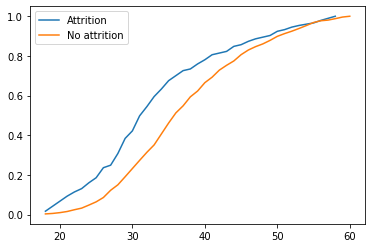

In [16]:
CDF1.plot(label="Attrition")
CDF2.plot(label="No attrition")
plt.legend()
plt.show()


## Kernel Density Estimation

Un KDE es una forma de pasar una PMF (probability mass function), a una PDF (probability density function, como la distribución normal).

En pocas palabras, en un sampling de 100 números, es probable que la PMF tenga valores muy distribuidos y no se parezca a la campana de gauss. Por ello, podemos ver la relación real que hay entre una PMF y una PDF con el KDE

In [26]:
# Cargamos paquetes

import numpy as np #linspace
from scipy.stats import norm, zscore # para crear valores normalizados
import seaborn as sns #para el KDE

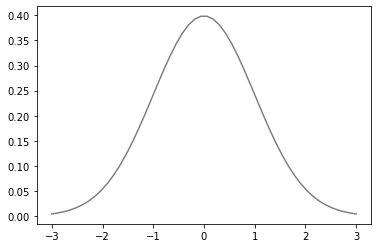

In [31]:
# Creamos una curva normal

x_var = np.linspace(-3,3) # valores distribuidos equitativamente entre -3 y 3
y_var = norm(0,1).pdf(x_var) #valores normales con media cero, dt 1, creándose a partir de la PDF de x
plt.plot(x_var, y_var, color="gray")

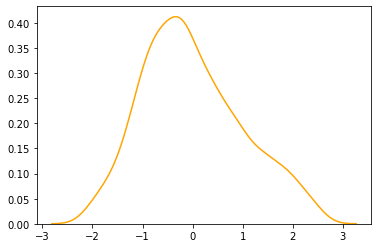

In [33]:
# Creamos la KDE de las edades en IBM (recuerda, KDE es una forma de convertir PMF en PDF!)

sample = df["Age"].values

sample_zvalues = zscore(sample)

sns.kdeplot(sample_zvalues, color="orange")



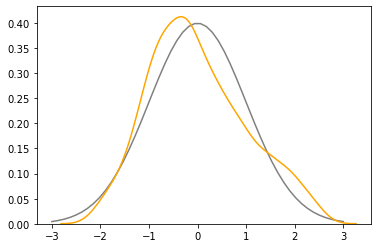

In [34]:
# Comparamos la distribución de las edades con la curva normal

x_var = np.linspace(-3,3) # valores distribuidos equitativamente entre -3 y 3
y_var = norm(0,1).pdf(x_var) #valores normales con media cero, dt 1, creándose a partir de la PDF de x
plt.plot(x_var, y_var, color = "gray")
sns.kdeplot(sample_zvalues, color="orange")